In [2]:
import spacy

# GiNZA日本語UDモデル を Spacy でロード
nlp = spacy.load('ja_ginza')

# 解析対象文字列を渡す
doc = nlp('今年の干支は庚子です。東京オリンピックたのしみだなあ。')

# 形態素解析結果
for sent in doc.sents:
    for token in sent:
        print(token.i, token.orth_, token.lemma_, token.pos_, 
              token.tag_, token.dep_, token.head.i)

0 今年 今年 NOUN 名詞-普通名詞-副詞可能 nmod 2
1 の の ADP 助詞-格助詞 case 0
2 干支 干支 NOUN 名詞-普通名詞-一般 nsubj 4
3 は は ADP 助詞-係助詞 case 2
4 庚子 庚子 NOUN 名詞-普通名詞-一般 ROOT 4
5 です です AUX 助動詞 cop 4
6 。 。 PUNCT 補助記号-句点 punct 4
7 東京 東京 PROPN 名詞-固有名詞-地名-一般 compound 9
8 オリンピック オリンピック NOUN 名詞-普通名詞-一般 compound 9
9 たのしみ 楽しみ NOUN 名詞-普通名詞-一般 ROOT 9
10 だ だ AUX 助動詞 cop 9
11 なあ な PART 助詞-終助詞 aux 9
12 。 。 PUNCT 補助記号-句点 punct 9


In [2]:
# 依存関係の可視化
from spacy import displacy

displacy.serve(doc, style='dep', options={'compact':True})
## => Visualizer が localhost:5000 で稼働

/home/mint/anaconda3/envs/py36/lib/python3.6/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



192.168.81.1 - - [06/Feb/2020 01:15:08] "GET / HTTP/1.1" 200 8680
192.168.81.1 - - [06/Feb/2020 01:15:09] "GET /favicon.ico HTTP/1.1" 200 8680


Shutting down server on port 5000.


In [3]:
# 単語のベクトル化
doc = nlp('あきらめたらそこで試合終了だ')
token = doc[4]

print(token)
print(token.vector)
print(token.vector.shape)

試合
[-1.7299166   1.3438352   0.51212436  0.8338855   0.42193085 -1.4436126
  4.331309   -0.59857213  2.091658    3.1512427  -2.0446565  -0.41324708
 -1.6249566   2.0849636  -1.1432786   0.4402521  -0.2996736  -1.2537657
 -1.4408176  -3.61768     0.7704964   2.102502    2.0921223   0.04206143
 -1.8395482   0.18499917 -0.2579822  -1.4813038  -0.73962873  0.36772487
 -0.52210647  1.9044702   0.4267643  -0.80647945 -1.0729067  -0.11970597
 -0.6600776  -0.02893271  2.1134949  -0.9696921   0.06669673  0.17631757
  1.333448   -0.19496314 -2.5899901  -0.08864212 -0.69199586  0.44197303
 -1.7922851  -0.6862237   0.3803087   0.53696775  1.1550635   0.79316735
 -0.45592362  1.8070105  -0.5869399  -1.923917   -1.1303633   0.5251339
 -1.8638126  -0.8316108   1.543806   -0.6436903   2.7160945   1.0952429
  0.01095889 -0.7106281   0.33451897 -0.3829015  -2.5569937   2.485877
  2.0016584  -0.3864923   1.1195239  -0.09876658 -1.4376799   1.3623239
  0.82006216  0.6577988  -0.58017254  1.5773239  -0.822

In [4]:
# 単語間の類似度
word1 = nlp('おむすび')
word2 = nlp('おにぎり')
word3 = nlp('カレー')

print(word1.similarity(word2)) # おむすび と おにぎり の類似度は高い
print(word1.similarity(word3)) # おむすび と カレー の類似度は低い

0.8016603151410209
0.5304326882294994


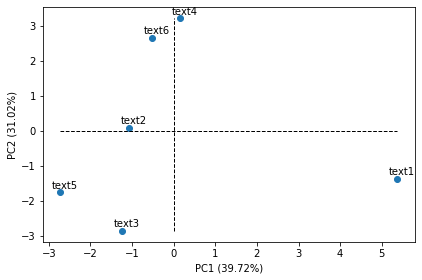

In [5]:
'''
単語をベクトル空間に落とし込む
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#text2vector
vec1 = nlp('あけましておめでとうございます').vector
vec2 = nlp('昨日キャベツを買った').vector
vec3 = nlp('映画を観に行こう').vector
vec4 = nlp('カレーが食べたい').vector
vec5 = nlp('買い物しようと町まで出かけた').vector
vec6 = nlp('昨日食べたチョコレート').vector

#pca
vectors = np.vstack((vec1, vec2, vec3, vec4, vec5, vec6))
pca = PCA(n_components=2).fit(vectors)
trans = pca.fit_transform(vectors)
pc_ratio = pca.explained_variance_ratio_

#plot
plt.figure()
plt.scatter(trans[:,0], trans[:,1])

i = 0
for txt in ['text1','text2','text3','text4','text5','text6']:
    plt.text(trans[i,0]-0.2, trans[i,1]+0.1, txt)
    i += 1

plt.hlines(0, min(trans[:,0]), max(trans[:,0]), linestyle='dashed', linewidth=1)
plt.vlines(0, min(trans[:,1]), max(trans[:,1]), linestyle='dashed', linewidth=1)
plt.xlabel('PC1 ('+str(round(pc_ratio[0]*100,2))+'%)')
plt.ylabel('PC2 ('+str(round(pc_ratio[1]*100,2))+'%)')
plt.tight_layout()
plt.show()